## Analyzing the first 10 million digits of pi: Randomness within structure



```
dataset - https://introcs.cs.princeton.edu/java/data/
```

In [1]:
import requests
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = b"https://introcs.cs.princeton.edu/java/data/pi-10million.txt"

In [3]:
response = requests.get(url)
data = response.text
cnts = Counter(data)

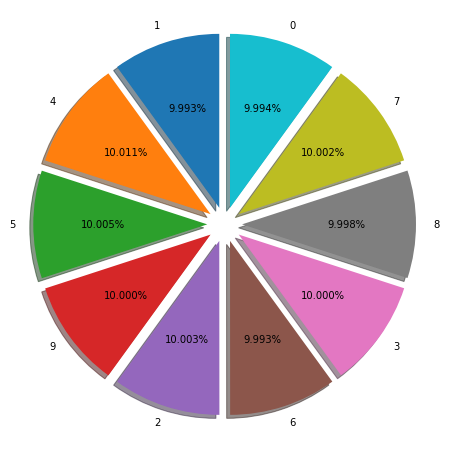

In [4]:
explode = [0.1]*len(cnts.keys())
fig, ax = plt.subplots(figsize=(8,8))
digits_dist = ax.pie(list(cnts.values()), explode=explode, 
                     labels=list(cnts.keys()), autopct='%1.3f%%',
                     shadow=True, startangle=90);

```sas
/* read data over the internet from a URL */
filename rawurl url "http://www.cs.princeton.edu/introcs/data/pi-10million.txt"
/* proxy='http://yourproxy.company.com:80' */ ;
 
data PiDigits;
   infile rawurl lrecl=10000000;
   input Digit 1. @@;
   Position = _n_;
   Diff = dif(digit);      
/* compute difference between adjacent digits */
run;
 
proc print data=PiDigits(obs=9);
   var Digit;
run;

/* Are the digits 0-9 equally distributed? */
proc freq data = PiDigits;
tables Digit/ chisq out=DigitFreq;
run;

data DigitFreq;
   set DigitFreq;
   Pct = Percent/100; 
   format Pct PERCENT8.2;
run;
 
/* macro from https://blogs.sas.com/content/graphicallyspeaking/2012/08/26/how-about-some-pie/ */
%GTLPieChartMacro(data=DigitFreq, category=Digit, response=Pct,
         title=Distribution of First 10 Million Digits of Pi,
         DataSkin=NONE);

proc sgplot data=PiDigits(obs=1000000);  
   vbar Diff;
run;

proc autoreg data=PiDigits(obs=1000000);  
   model Digit = / dw=5 dwprob;
run;

proc print noobs data=PiDigits(firstobs=4686485 obs=4686491);
   var Position Digit;
run;

/*
https://blogs.sas.com/content/iml/2015/03/12/digits-of-pi.html#prettyPhoto
*/
```